# 합성곱 신경망의 시각화
## 가중치 시각화

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]

In [4]:
conv_weights = conv.weights[0].numpy()

In [5]:
import numpy as np

In [6]:
conv_weights.mean(), conv_weights.std(), conv_weights.ndim

(-0.029797073, 0.2739086, 4)

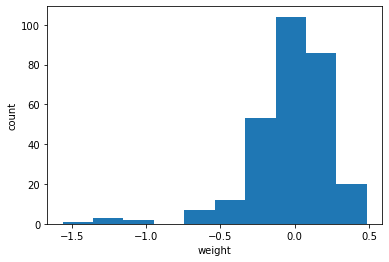

In [7]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1)) # hist 함수를 위해 1차원으로 reshape
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [8]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [9]:
no_training_conv = no_training_model.layers[0]

In [10]:
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [11]:
no_training_weights = no_training_conv.weights[0].numpy()

no_training_weights.mean(), no_training_weights.std(), no_training_weights.ndim
# 평균은 이전과 비슷하지만, 표준편차가 작아짐

(-0.0026388792, 0.08213697, 4)

Text(0, 0.5, 'cnt')

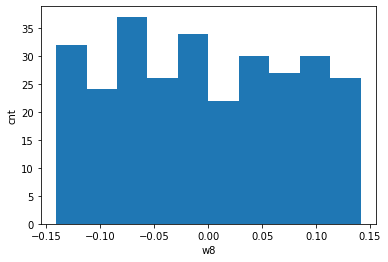

In [12]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('w8')
plt.ylabel('cnt')

# 대부분의 가중치가 -0.15 ~ 0.15 사이에 비교적 고른 분포를 보인다.
# 텐서플로가 신경망 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택했기 때문! 

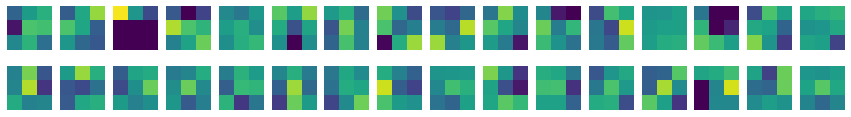

In [13]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

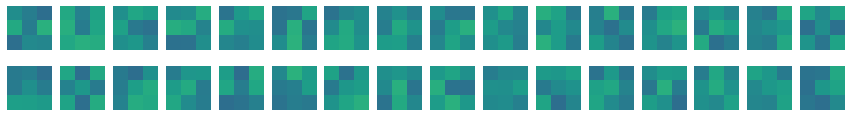

In [14]:
# 가중치가 밋밋하게(?) 초기화
# 분류 정확도를 높이기 위해 유용한 패턴을 학습했다고 보면 된다.

fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
        
plt.show()

# 함수형 API
입출력이 2개일 수 경우 Sequantial 사용은 무리

### Dense 층 2개로 이루어진 완전연결 신경망

In [15]:
# dense1 = keras.layers.Dense(100, activation='sigmoid')
# dense2 = keras.layers.Dense(10, activation='softmax')

이 두 객체를 Sequential 클래스 객체의 add() 에 넘길 수도 있겠지만, 아래와 같이 함수처럼 호출도 가능하다!!

In [16]:
# inputs = keras.Input(shape=(784, ))

In [17]:
# hidden = dense1(inputs)
# outputs = dense2(hidden)

# model = keras.Model(inputs, outputs)

체인처럼, 입력에서 출력까지 연결하고, 마지막에 Model 클래스에 입력과 출력을 지정해 모델을 만든다.   
## 함수형 객체 필요의 이유
1. (2절) model 객체 > Input Layer > Conv2D > Maxpooling2D > Conv2D > Maxpooling2D > Flatten > Dense > Dropout > Dense 
: 필요한 것 :: 첫 번째 Conv2D의 출력값! => model 객체의 입력과 Conv2D의 출력을 알면, 이 둘을 연결해 새 모델을 얻을 수 있음!!! 

In [18]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [19]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

# Feature Map Viz

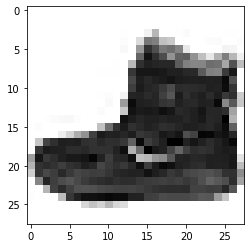

In [20]:
# Sample
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')

이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 보고자 한다.  
predict() 메소드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대한다.  
하나의 샘플만을 전달하더라도, 꼬옥 첫 번째 차원을 유지해야만 한다.  

In [21]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv_acti.predict(inputs)

In [22]:
feature_maps.shape

(1, 28, 28, 32)

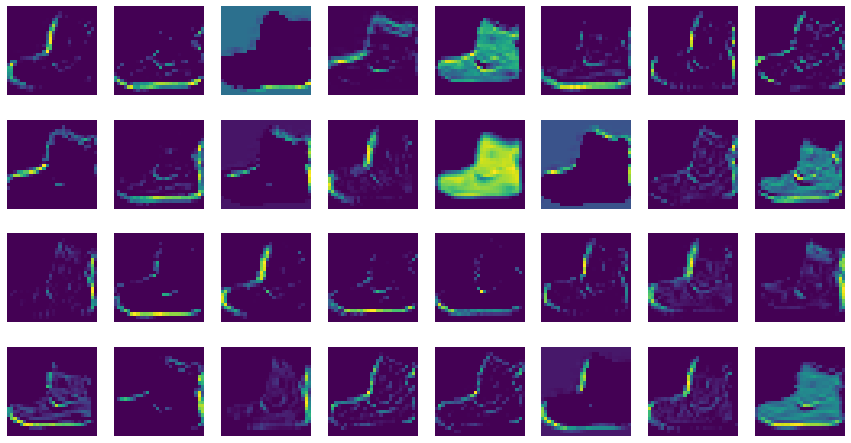

In [26]:
# 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여준다.
fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
        
plt.show()

In [27]:
# 두 번째 합성곱 층이 만든 특성맵 확인
conv2_acti = keras.models.Model(model.input,  model.layers[2].output)

In [28]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255 # scaling
feature_maps = conv2_acti.predict(inputs)

In [30]:
feature_maps.shape

(1, 14, 14, 64)

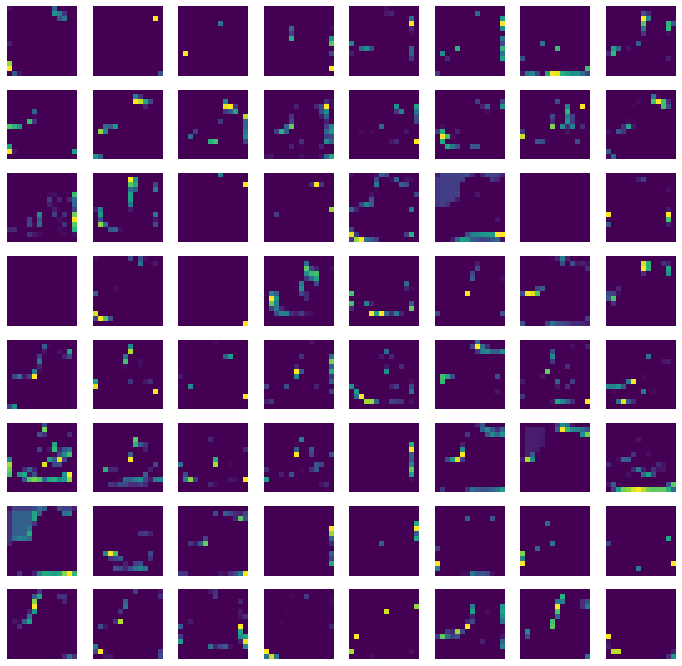

In [32]:
# 시각적 이해가 어려움!!
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
        
plt.show()